In [4]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
## load the data
df = pd.read_csv(r"emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [ ]:
df = df.drop(columns=['Email No.'])

In [ ]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [ ]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [ ]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


LogisticRegression()

In [ ]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [ ]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.9652173913043478
[[700  16]
 [ 20 299]]


In [ ]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

In [ ]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [ ]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9458937198067633
[[676  40]
 [ 16 303]]


In [ ]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       716
           1       0.88      0.95      0.92       319

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [ ]:
pip install mlxtend

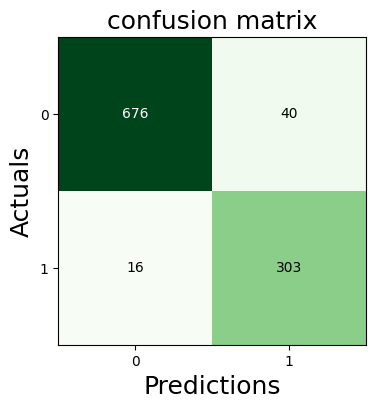

In [ ]:
## confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4), cmap='Greens')
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()


AUC: 0.946989


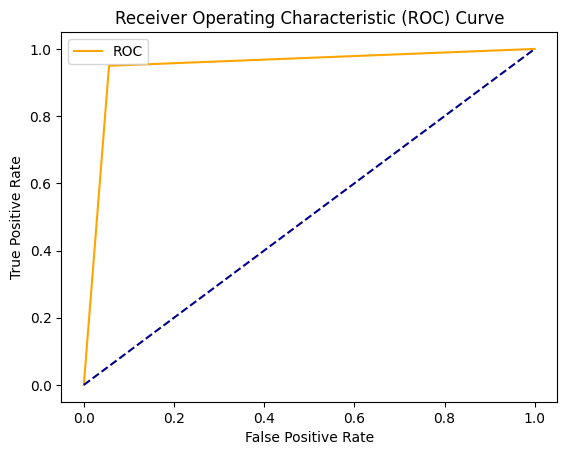

In [ ]:

auc_mod2 = roc_auc_score(y_test, y_pred_NB)
print('AUC: %f' %auc_mod2)

fpr, tpr, _= roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
## 0 and 1
#0.5 ----randomely guessing
#less than 0.5 poor model and you need to go back and try several other models
#1--- indicating that your model is able to predict positive and negative classess perfectly

In [ ]:
from sklearn.datasets import load_iris
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target


## split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)


## random classifier
clf = RandomForestClassifier(n_estimators=20, random_state=32)


clf.fit(X_train, y_train)



# predict on the test set

y_pred = clf.predict(X_test)

In [ ]:
## multi labelconfusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
confusion_mat

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

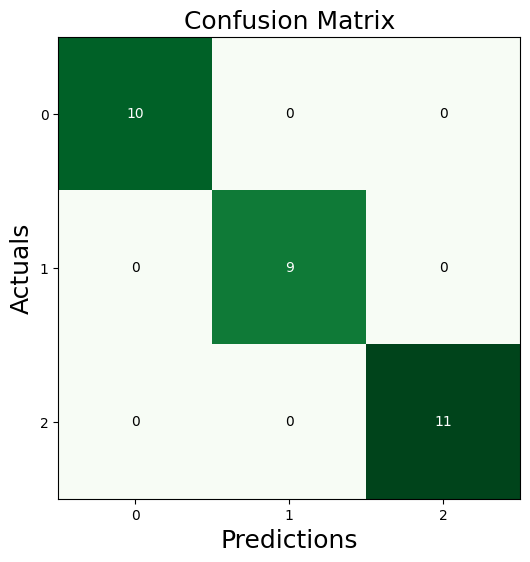

In [ ]:

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(confusion_mat, figsize=(6, 6), cmap='Greens')
ax.set_xlabel('Predictions', fontsize=18)
ax.set_ylabel('Actuals', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=18)
plt.show()


In [ ]:
## ravel funcrion from scikit learn
for element, conf in enumerate(confusion_mat):
    TN, FP, FN, TP = conf.ravel()
    
    print('class', element)
    print(TN)
    print(FP)
    print(TN)
    print(FN)

class 0
18
0
18
0
class 1
21
0
21
0
class 2
21
0
21
0


In [8]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential 